In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import pca
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

boston.shape

(506, 14)

# Singular Value Decomposition

Zerlegt eine Matrix in drei andere Matrizen --> Dimensionen von Daten zu reduzieren
1. 𝑈:
2. Σ
3. V^T
Die SVD stellt eine Matrix 𝑋 als das Produkt der drei Matrizen dar: X = 𝑈* Σ* 𝑉^T

# b) 

In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
tgt = boston.TGT
boston = boston.drop(columns=["TGT"])

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=10, svd_solver='full'))
pipe.fit(boston)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=10, svd_solver='full'))])

In [7]:
singular_values = pipe.named_steps['pca'].singular_values_
print(singular_values)

[55.6793095  26.93022859 25.07516773 20.83105866 20.55278239 18.23864114
 16.45874174 14.15716218 11.83779223 10.55653065]


In [8]:
principal_components, projections, std_devs = pca(boston, boston.shape[1])
print(std_devs)

[2.47524723 1.19719469 1.11472717 0.92605351 0.91368262 0.8108065
 0.73168032 0.62936263 0.52625405 0.46929503 0.43129383 0.41146443
 0.25201044]


In [16]:
projections = pd.DataFrame(projections)

should be the same as my implementation

In [17]:
print(projections.var())
print(std_devs**2)

0     6.126849
1     1.433275
2     1.242617
3     0.857575
4     0.834816
5     0.657407
6     0.535356
7     0.396097
8     0.276943
9     0.220238
10    0.186014
11    0.169303
12    0.063509
dtype: float64
[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.27694333 0.22023782 0.18601437 0.16930298
 0.06350926]


In [18]:
sklearn_projections = pd.DataFrame(pipe.transform(boston))
sklearn_projections

,0,1,2,3,4,5,6,7,8,9
0,-2.098297,0.773113,0.342943,-0.891774,-0.423070,0.315338,0.318641,-0.295832,-0.424937,-0.640206
1,-1.457252,0.591985,-0.695199,-0.487459,0.195876,-0.264223,0.553861,0.223670,-0.166962,-0.084236
2,-2.074598,0.599639,0.167122,-0.739204,0.934534,-0.448095,0.484560,-0.105166,0.069775,0.180380
3,-2.611504,-0.006871,-0.100284,-0.343721,1.104956,-0.664649,0.622641,-0.255941,-0.342246,-0.045901
4,-2.458185,0.097712,-0.075348,-0.427907,1.065924,-0.617047,0.705086,0.134524,-0.417668,0.140880
...,...,...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,1.121040,-0.508064,0.199056,0.249896,0.877036,-0.183086
502,-0.110513,0.759308,-1.255979,-0.309376,0.891542,-0.408208,0.191779,0.146502,0.853628,-0.631847
503,-0.312360,1.155246,-0.408598,-0.786304,1.595185,-0.467947,0.294119,0.638660,0.981032,-0.589670
504,-0.270519,1.041362,-0.585454,-0.678134,1.416024,-0.482259,0.271597,0.579344,0.936755,-0.594610


In [19]:
# Eigenwerte der Kovarianzmatrix berechnen
eigenvalues = std_devs**2 #/ do not need to divide by n - 1 (boston.shape[0] - 1) because we already did that in pca.py

# Erklärte Varianz berechnen
explained_variance = eigenvalues / np.sum(eigenvalues)

# Kumulative erklärte Varianz berechnen
cumulative_explained_variance = np.cumsum(explained_variance)

# Ergebnisse in einem DataFrame zusammenstellen
results_df = pd.DataFrame({
    'Eigenwerte': eigenvalues,
    'Erklärte Varianz': explained_variance,
    'Kumulative erklärte Varianz': cumulative_explained_variance,
    'Fehler in %': np.abs(1 - cumulative_explained_variance)
})

# Ausgabe der Tabelle
results_df

,Eigenwerte,Erklärte Varianz,Kumulative erklärte Varianz,Fehler in %
0,6.126849,0.471296,0.471296,5.287039e-01
1,1.433275,0.110252,0.581548,4.184520e-01
2,1.242617,0.095586,0.677134,3.228661e-01
3,0.857575,0.065967,0.743101,2.568988e-01
4,0.834816,0.064217,0.807318,1.926822e-01
5,0.657407,0.050570,0.857888,1.421124e-01
6,0.535356,0.041181,0.899069,1.009312e-01
7,0.396097,0.030469,0.929538,7.046214e-02
8,0.276943,0.021303,0.950841,4.915880e-02
9,0.220238,0.016941,0.967783,3.221743e-02


# Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

- 10% Fehler zulassen = 90% der Varianz erklären heißt man nimmt die ersten 8 Spalten
- 5% Fehler zulassen = 95% der Varianz erklären heißt 9 Spalten mitnehmen
- 1% Fehler zulassen = 99% der Varianz erklären heißt 12 Spalten mitnehmen

# c)

In [20]:
projections

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.096223,0.772348,0.342604,-0.890892,-0.422652,0.315026,-0.318326,-0.295539,-0.424517,0.639573,-0.032968,-0.019421,-0.365614
1,-1.455811,0.591400,-0.694512,-0.486977,0.195682,-0.263962,-0.553314,0.223449,-0.166797,0.084153,-0.640176,0.125673,0.070650
2,-2.072547,0.599047,0.166956,-0.738473,0.933610,-0.447652,-0.484081,-0.105062,0.069706,-0.180202,-0.487075,-0.133195,0.014008
3,-2.608922,-0.006864,-0.100185,-0.343381,1.103864,-0.663992,-0.622025,-0.255688,-0.341907,0.045856,-0.359853,-0.508175,-0.007839
4,-2.455755,0.097615,-0.075274,-0.427484,1.064870,-0.616437,-0.704389,0.134391,-0.417255,-0.140741,-0.394759,-0.497240,-0.014260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.314656,0.723568,-0.860045,-0.434310,1.119931,-0.507562,-0.198860,0.249649,0.876169,0.182905,0.493102,-0.449941,-0.078900
502,-0.110404,0.758557,-1.254737,-0.309070,0.890661,-0.407804,-0.191589,0.146358,0.852784,0.631223,0.375316,-0.251833,-0.037125
503,-0.312052,1.154104,-0.408194,-0.785527,1.593607,-0.467484,-0.293829,0.638029,0.980062,0.589087,0.115542,-0.281685,-0.062412
504,-0.270252,1.040332,-0.584875,-0.677463,1.414624,-0.481783,-0.271329,0.578772,0.935829,0.594023,0.086926,-0.301403,-0.054316


In [21]:
correlation_matrix = projections.corr()
correlation_matrix.round(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
1,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
2,0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
3,0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
4,-0.0,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
5,0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
6,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
7,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0
8,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,-0.0
9,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0


Diagonalwerte sind alle 1, da jede Hauptkomponente mit sich selbst vollständig korreliert ist.
Off-Diagonalwerte sind 0, was bedeutet, dass die Hauptkomponenten unkorreliert sind. Dies ist eine wichtige Eigenschaft von PCA, da PCA die Daten so transformiert, dass die Hauptkomponenten unkorreliert werden.

# d)

In [22]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


Die Variablen korrelieren miteinander

# e)

In [27]:
bigger_than_median = tgt > tgt.median()

<Axes: xlabel='CRIM', ylabel='ZN'>

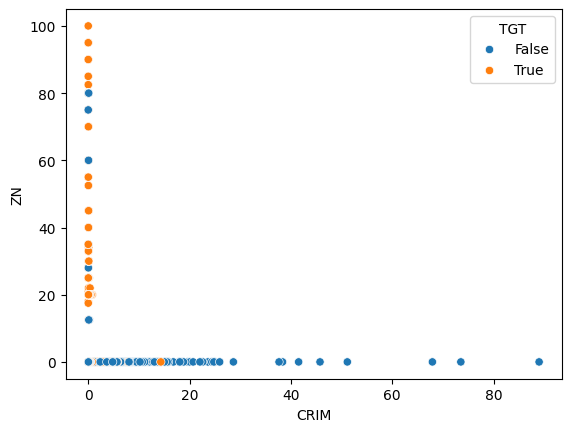

In [28]:
sns.scatterplot(x=boston.iloc[:,0], y=boston.iloc[:,1], hue=bigger_than_median)

<Axes: xlabel='0', ylabel='1'>

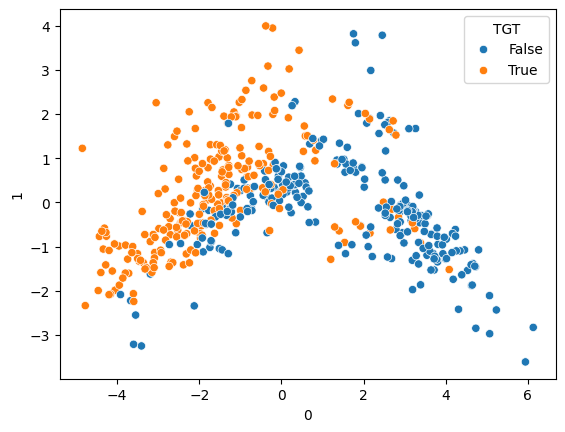

In [29]:
sns.scatterplot(x=projections.iloc[:,0], y=projections.iloc[:,1], hue=bigger_than_median)

die beiden Variablen eignen sich für die Vorhersage des Hauspreises, da sie hohe und niedrige Preise sinnvoll separieren